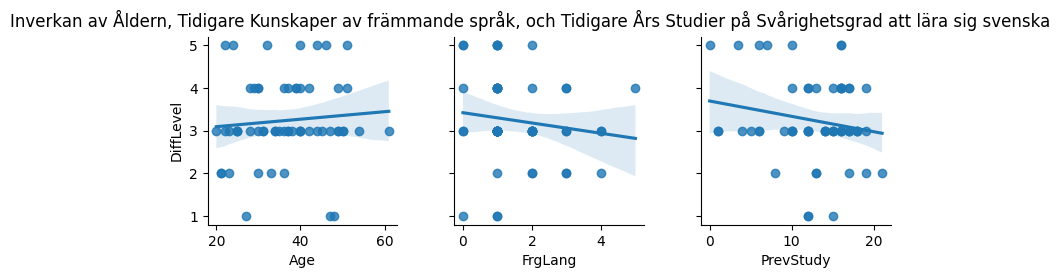

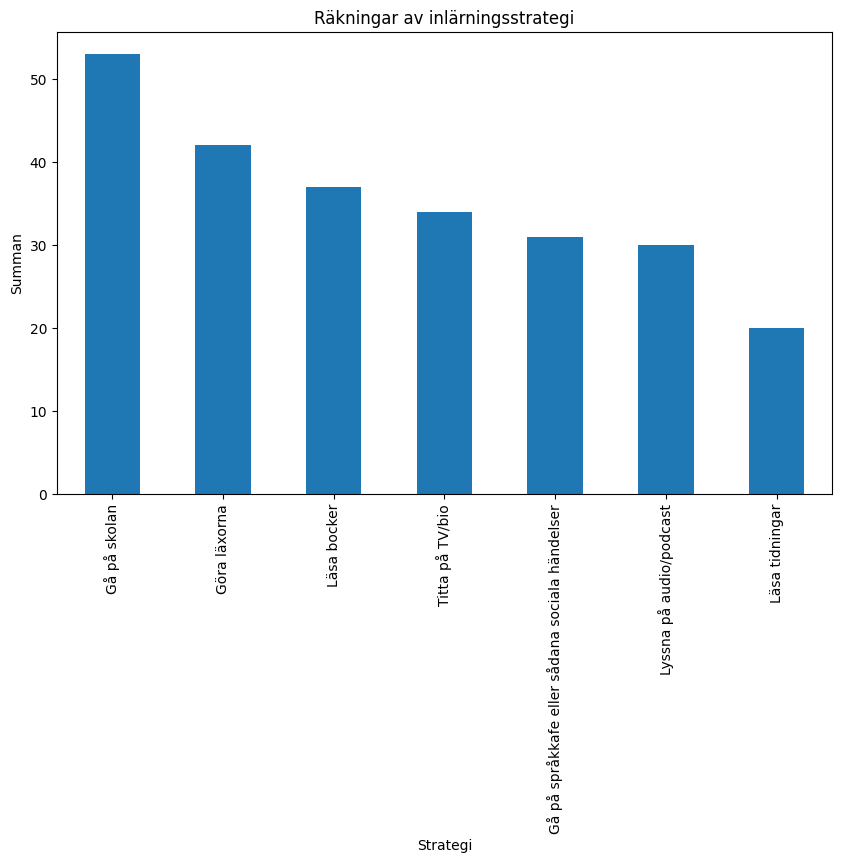

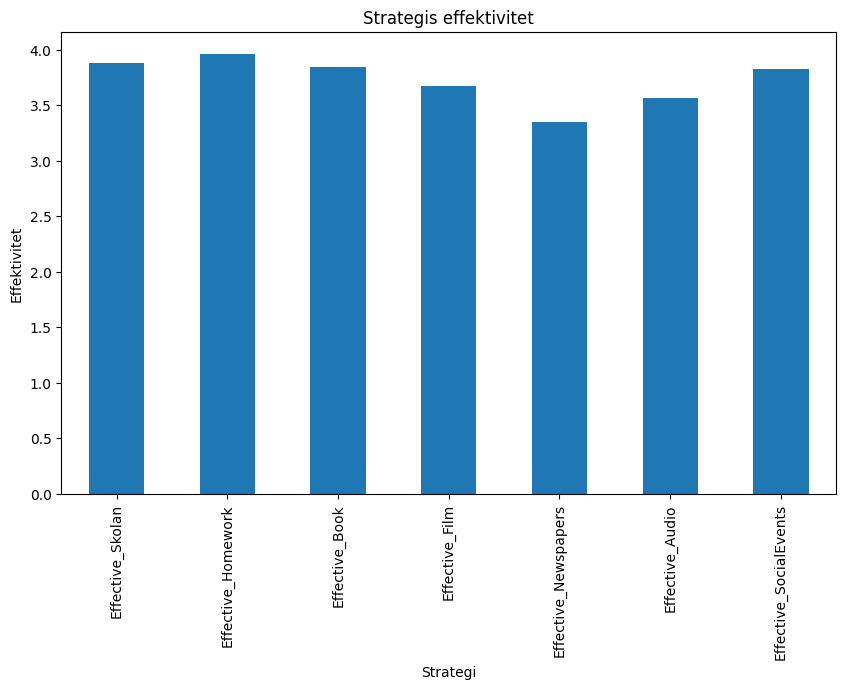

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   #A library that makes it easy to create beautiful plots and charts
df = pd.read_csv('Data.csv')

columns_of_interest = ['Age', 'FrgLang', 'PrevStudy', 'DiffLevel']  #Select the columns we want
df_subset = df[columns_of_interest]        #Create a new table with just these columns

#df_subset['FrgLang'] = df_subset['FrgLang'].astype('category').cat.codes   #Convert words into numbers (in case columns about languages may list out the words)
#df_subset['PrevStudy'] = df_subset['PrevStudy'].astype('category').cat.codes

sns.pairplot(df_subset, x_vars = ['Age', 'FrgLang', 'PrevStudy'], y_vars = 'DiffLevel', kind = 'reg')   #These are the variables we want to compare against Difficulty Level, kind = leg adds a line to each graph to show trends
plt.suptitle('Inverkan av Åldern, Tidigare Kunskaper av främmande språk, och Tidigare Års Studier på Svårighetsgrad att lära sig svenska', y = 1.07) #Add title to the whole graph, and adjust title's position with y
plt.subplots_adjust(wspace=0.3, hspace=0.3,)    #Adjust spacing between plots
plt.show()

strategy_options =df['Strategy'].str.split(';')    #Split column strategy, IMPORTANT: must use ; and not , because , does not split the options
all_options = [option.strip() for sublist in strategy_options for option in sublist]  #Flatten the list of lists into a single list
option_counts = pd.Series(all_options).value_counts()   #Count the occurences of each option
option_counts.plot(kind = 'bar', figsize =(10,6), title = 'Räkningar av inlärningsstrategi')
plt.xlabel('Strategi')
plt.ylabel('Summan')
plt.show()

effectiveness_columns = ['Effective_Skolan','Effective_Homework','Effective_Book','Effective_Film','Effective_Newspapers','Effective_Audio','Effective_SocialEvents'] #Define the columns related to effectiveness
effectiveness_mapping = {'Inte effektivt alls':1, 'Lite effektivt':2, 'Neutral':3, 'Effektivt':4, 'Mycket effektivt':5}  #Convert effectiveness mapping to numbers
for col in effectiveness_columns:
    df[col] = df[col].map(effectiveness_mapping)
mean_effectiveness = df[effectiveness_columns].mean()    #Calculate the mean effectiveness
mean_effectiveness.plot(kind='bar', figsize=(10,6), title='Strategis effektivitet') #Draw graph with bar type
plt.xlabel('Strategi')
plt.ylabel('Effektivitet')
plt.show()